In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import matplotlib

%matplotlib inline
# 設定圖形大小; DPI越大圖越大
plt.rcParams["figure.dpi"] = 100

In [4]:
df = pd.read_csv('Stats_Data/Netflix Original Content Dataset.csv')
#df

### Data Process

In [5]:
genres = df['Genre'].values

In [6]:
genres = df['Genre'].values
genre_list = [genre.split(", ") for genre in genres]
# for genre in genres:
#     genre_list.append(genre.split(", "))used = set()
used = set()
genre_unique = [genre_type for one_genre in genre_list for genre_type in one_genre if genre_type not in used and (used.add(genre_type)or True)]
for unique_genre in genre_unique:
    temp = [unique_genre in genre for genre in genre_list]
    df[unique_genre] = temp
#df

Use average rating to indicate rating of films or TVs

In [7]:
rating = []
for i in range(136):
  num = 0
  sum = 0
  if not df['RT Critic Score'].isna()[i]:
    num += 1
    sum += df['RT Critic Score'][i]
  if not df['RT Audience Score'].isna()[i]:
    num += 1
    sum += df['RT Audience Score'][i]
  if not df['IMDb Rating'].isna()[i]:
    num += 1
    sum += df['IMDb Rating'][i]*10
  rating.append(sum/3)
df['Average_rating'] = rating
df

,Title,Type,Year Released,Seasons,Main Actor,Genre,International,Animated,RT Critic Score,RT Audience Score,...,Thriller,Drama,Teen,Action,Mystery,Romance,Fantasy,Horror,British,Average_rating
0,#realityhigh,Film,2017,NaN,Female,Comedy,no,no,40.0,53,...,False,False,False,False,False,False,False,False,False,48.333333
1,13TH,Film,2016,NaN,Both,Crime,no,no,97.0,91,...,False,False,False,False,False,False,False,False,False,90.000000
2,1922,Film,2017,NaN,Male,Thriller,no,no,88.0,57,...,True,False,False,False,False,False,False,False,False,69.333333
3,1983,TV,2018,1.0,Male,"Crime, Drama",yes,no,100.0,81,...,False,True,False,False,False,False,False,False,False,84.000000
4,22-Jul,Film,2018,NaN,Both,"Drama, Thriller",no,no,79.0,69,...,True,True,False,False,False,False,False,False,False,71.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,The Highwaymen,Film,2019,NaN,Male,Drama,no,no,56.0,77,...,False,True,False,False,False,False,False,False,False,67.666667
132,The Umbrella Academy,TV,2019,1.0,Both,"Action, Mystery, Fantasy",no,no,76.0,85,...,False,False,False,True,True,False,True,False,False,80.666667
133,Elite,TV,2018,1.0,Both,Crime,yes,no,100.0,83,...,False,False,False,False,False,False,False,False,False,86.333333
134,Baby,TV,2018,1.0,Female,"Drama, Teen",yes,no,80.0,78,...,False,True,True,False,False,False,False,False,False,75.333333


### Overview of rating and viewership

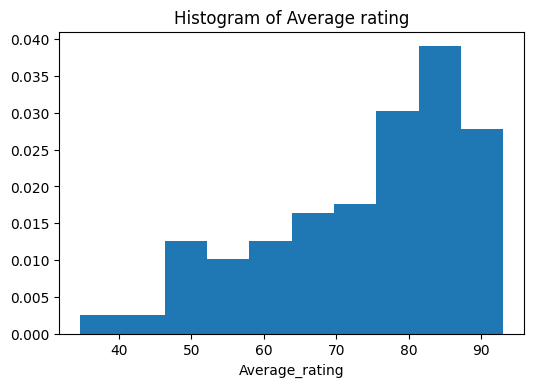

In [8]:
plt.hist('Average_rating',data=df,density=True,bins=10)
plt.xlabel('Average_rating')
plt.title('Histogram of Average rating')
plt.show()

We could find out the distribution is left-skewed, and mostly between 80-90 rating.

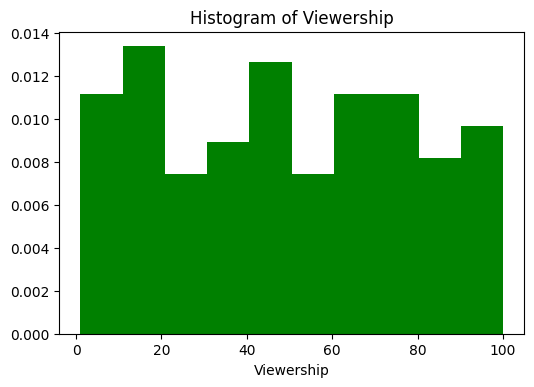

In [9]:
plt.hist('Viewership (Millions)',data=df,density=True,bins=10,color='g')
plt.xlabel('Viewership')
plt.title('Histogram of Viewership')
plt.show()

We could find out that the distribution of viewership is nornormal.

### Find relationship between rating and viewership

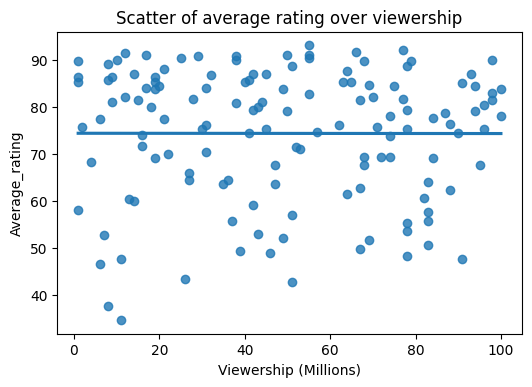

In [10]:
_ = sns.regplot(x='Viewership (Millions)',y = 'Average_rating', data=df, ci=None)
plt.title('Scatter of average rating over viewership')
plt.show()

Find out there doesn't exist linear relationship between viewership and average rating.

### Fin relationship between rating and other variable

In [11]:
genre_count = np.zeros(11)
for genre in genre_list:
    for index, unique_genre in enumerate(genre_unique):
        if unique_genre in genre:
            genre_count[index] += 1
genre_rating = np.zeros(11)
for ind,genre in enumerate(genre_list):
    for index, unique_genre in enumerate(genre_unique):
        if unique_genre in genre:
            genre_rating[index] += df['Average_rating'][ind]

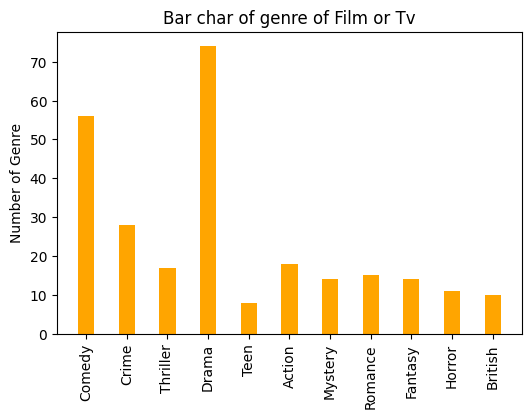

In [12]:
plt.bar(genre_unique,height=genre_count, width = 0.4,color ='orange')
plt.xticks(genre_unique, rotation = 90)
plt.ylabel('Number of Genre')
plt.title('Bar char of genre of Film or Tv')
plt.show()

We could find out genre of drama and comedy have more films and tv shows.

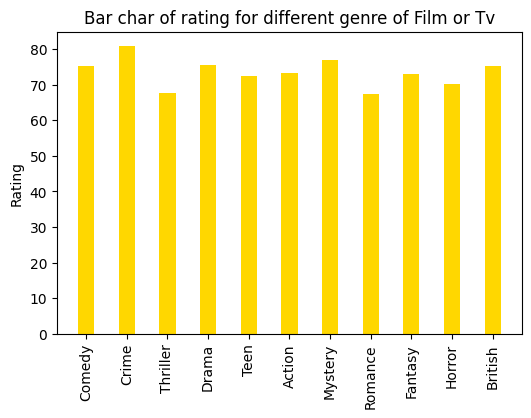

In [13]:
plt.bar(genre_unique,height=genre_rating/genre_count, width = 0.4,color ='gold')
plt.xticks(genre_unique, rotation = 90)
plt.ylabel('Rating')
plt.title('Bar char of rating for different genre of Film or Tv')
plt.show()

We could find out there isn't very significant difference between all type, while crime genre has the highest rating, thriller and romance has the lowest rating.

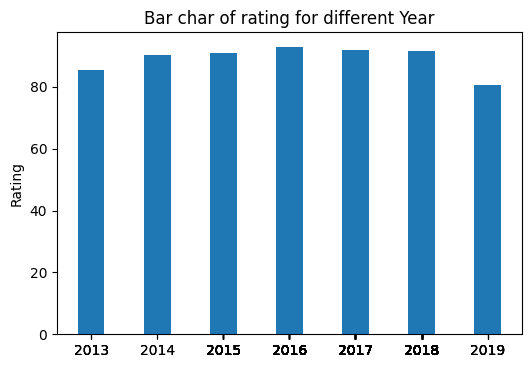

In [14]:
plt.bar('Year Released', 'Average_rating', data= df,width = 0.4)
plt.xticks(df['Year Released'])
plt.ylabel('Rating')
plt.title('Bar char of rating for different Year')
plt.show()

We could find out that film and movie in 2019 has the lowest rating, and flim and movie in 2016 has the highest ratingm

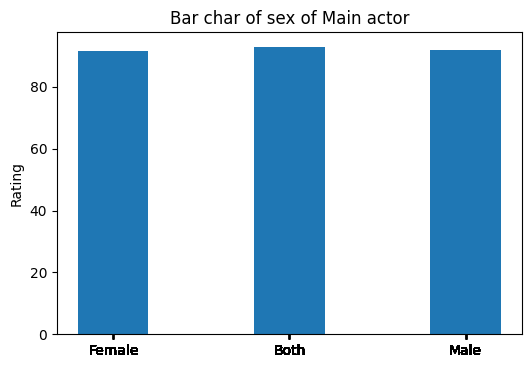

In [15]:
plt.bar('Main Actor', 'Average_rating', data= df,width = 0.4)
plt.xticks(df['Main Actor'])
plt.ylabel('Rating')
plt.title('Bar char of sex of Main actor')
plt.show()

We could find out there isn't signficant difference in average rating between different types of main actor

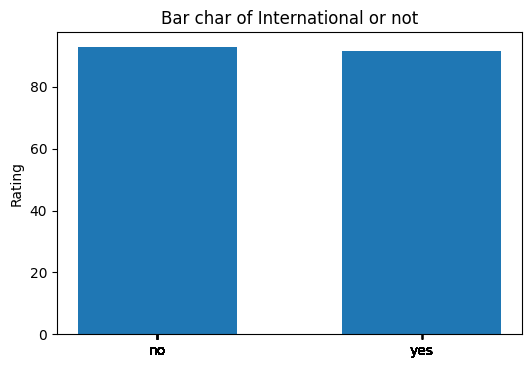

In [16]:
plt.bar('International', 'Average_rating', data= df,width = 0.6)
plt.xticks(df['International'])
plt.ylabel('Rating')
plt.title('Bar char of International or not')
plt.show()

Find out that there isn't significant difference in average rating with international or not

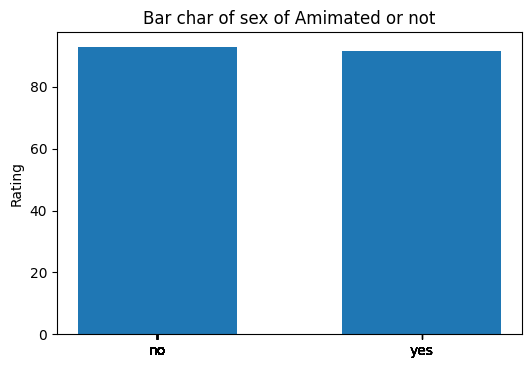

In [17]:
plt.bar('Animated', 'Average_rating', data= df,width = 0.6)
plt.xticks(df['Animated'])
plt.ylabel('Rating')
plt.title('Bar char of sex of Amimated or not')
plt.show()

We could find out there isn't significant difference in average rating with animated or not

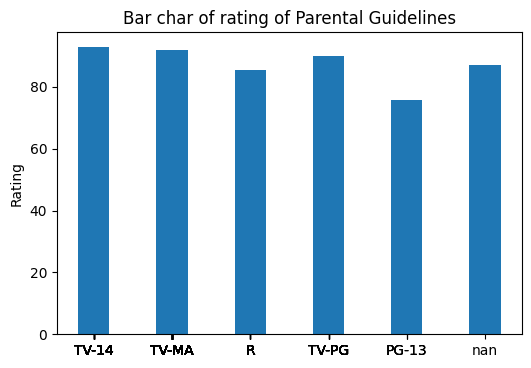

In [18]:
new_rating = [str(rate) for rate in df['Rating']]
for index,rating in enumerate(new_rating):
    if rating == 'Pg-13':
        new_rating[index] = 'PG-13'
df_temp = pd.DataFrame()
df_temp['new_rating'] = new_rating
df_temp['Average_rating'] = df['Average_rating']
plt.bar(x = df_temp['new_rating'], height = df_temp['Average_rating'],width = 0.4)
plt.xticks(df_temp['new_rating'])
plt.ylabel('Rating')
plt.title('Bar char of rating of Parental Guidelines')
plt.show()

We could find out that TV-14 has the highest rating, and PG-13 has the lowest.

In [19]:
df_temp.isna().all()

new_rating        False
Average_rating    False
dtype: bool

I have try to detect the nan in raiting, however, using isna() cannot fix the problem. I think the way to solve it is probably modify manually, which isn't a good way, so I leave the exists. 

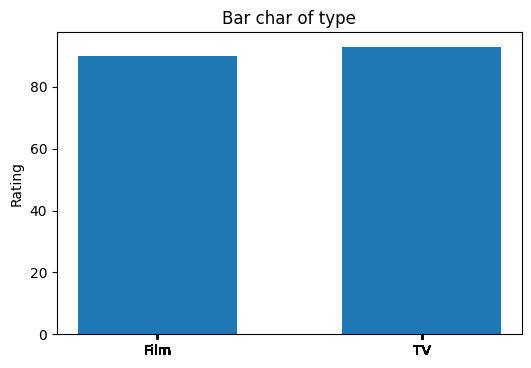

In [20]:
plt.bar('Type ', 'Average_rating', data= df,width = 0.6)
plt.xticks(df['Type '])
plt.ylabel('Rating')
plt.title('Bar char of type')
plt.show()

We could find out tv shows have higher average raiting than films.

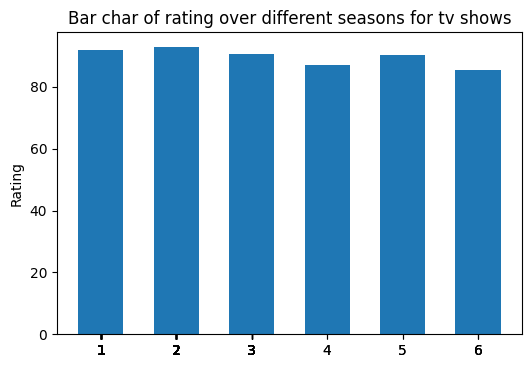

In [21]:
df_type_tv = df[df['Type '] == 'TV']
plt.bar('Seasons', 'Average_rating', data= df_type_tv,width = 0.6)
plt.xticks(df_type_tv['Seasons'])
plt.ylabel('Rating')
plt.title('Bar char of rating over different seasons for tv shows')
plt.show()

We could find out tv shows with 2 seasons have the most average rating and tv shows with 4 seasons have the most average rating.